In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from datetime import datetime

In [2]:
# Read the CSV file (replace 'sample.csv' with your actual file name)
df = pd.read_csv('C:/Users/ACER/OneDrive/Desktop/external project/gld_price_data.csv', parse_dates=['Date'], dayfirst=True)

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Format the date column as DD-MM-YYYY
df['formatted_date'] = df['Date'].dt.strftime('%d-%m-%Y')

# Save the modified DataFrame back to a new CSV file (if needed)
df.to_csv('New_gld_price_data.csv.csv', index=False)

print("Converted date format and saved to 'formatted_sample.csv'.")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

#Dropping Date column and counting only columns having numeric value
numeric_df = df.select_dtypes(include=['number'])


print(numeric_df)


Converted date format and saved to 'formatted_sample.csv'.
              SPX         GLD        USO      SLV   EUR/USD
0     1447.160034   84.860001  78.470001  15.1800  1.471692
1     1447.160034   85.570000  78.370003  15.2850  1.474491
2     1411.630005   85.129997  77.309998  15.1670  1.475492
3     1416.180054   84.769997  75.500000  15.0530  1.468299
4     1390.189941   86.779999  76.059998  15.5900  1.557099
...           ...         ...        ...      ...       ...
2285  2671.919922  124.589996  14.060000  15.5100  1.186789
2286  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 5 columns]


In [3]:
#print first 5 rows from this dataset
numeric_df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
numeric_df.tail()

,SPX,GLD,USO,SLV,EUR/USD
2285,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#No of rows and columns
numeric_df.shape

(2290, 5)

In [6]:
#Getting some basics info about the data
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [7]:
#checking no of missing columns
numeric_df.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting the statistical measures of the data
numeric_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Findinf the co-relation between the various problem in dataset


#Correlation: (Which column are related to which column)                
#1.Position Correlation(If one value increases oher also increases)      
#2.Negative Correlation(If oe value increases other decreases)

In [10]:
correlation = numeric_df.corr()

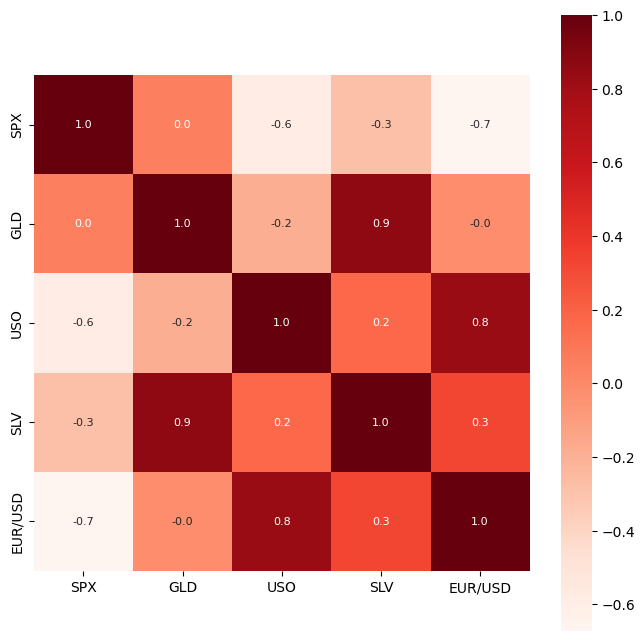

In [15]:
#constructing a heatmap to understand the correlation
# fmt='.1f' = No of decimal points we want
# annot=True = name of columns
#cmap='Blues' = color of matrix
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f' ,annot=True, annot_kws={'size': 8},cmap='Reds')
plt.show()

In [18]:
#correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ACER\AppData\Local\Temp\ipykernel_27280\3803146181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

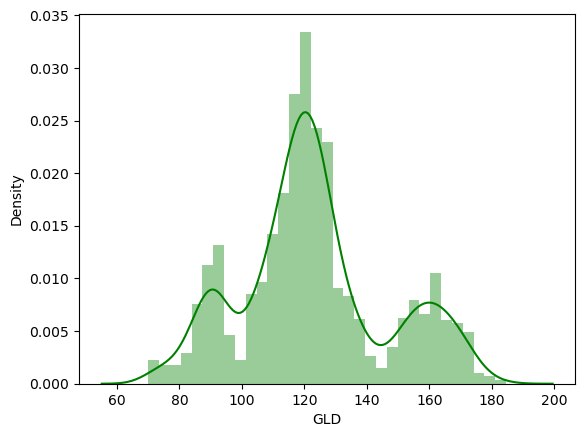

In [20]:
#checking the distribution of the GLD Price
sns.distplot(numeric_df['GLD'],color = 'green')

# Splitting the Features and Target

In [23]:
#Features in this dataset SPX,USO,SLV,EUR/USD
#Target in this dataset GLD
#For dropping column axis = 1
#For dropping column axis = 0
X = numeric_df.drop(['GLD'],axis=1)
Y = numeric_df['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training(80%) data and Test(20%) Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

# Model Training

Using Random Forest

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

In [30]:
#Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [31]:
#Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.73309954  82.06419975 116.24520036 127.69100086 120.78730154
 154.83009778 150.12809887 125.98990042 117.44979878 125.82860085
 116.94620058 171.98250073 141.94809921 168.10069853 115.20590003
 117.88910061 140.13720339 170.16630106 159.97000341 159.15959922
 155.25690056 125.10200065 176.06459938 157.61100314 125.26820049
  93.79169969  77.16860009 120.61429991 119.08639974 167.57100044
  88.42040007 125.12180023  91.05040058 117.70460041 121.16579917
 137.13830085 115.51480109 115.29840042 146.94660003 107.16790099
 104.20460231  87.24899804 126.59480054 118.03719933 152.93469879
 119.50100038 108.30809975 108.15359847  93.18200042 127.24129745
  75.65010002 113.58459896 121.15030004 111.45909923 118.808899
 120.40319951 159.60610085 167.75480135 146.76099731  85.76699848
  94.23530027  86.7374987   90.69340014 118.93210068 126.40190059
 127.47800049 170.34620048 122.11429932 117.42679885  98.38920069
 168.21090257 142.47009819 132.27330168 121.07140241 121.82119938
 119.8481008

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9889315261863563


Compare the Actual Values and Predicted Values i a Plot

In [34]:
Y_test = list(Y_test)

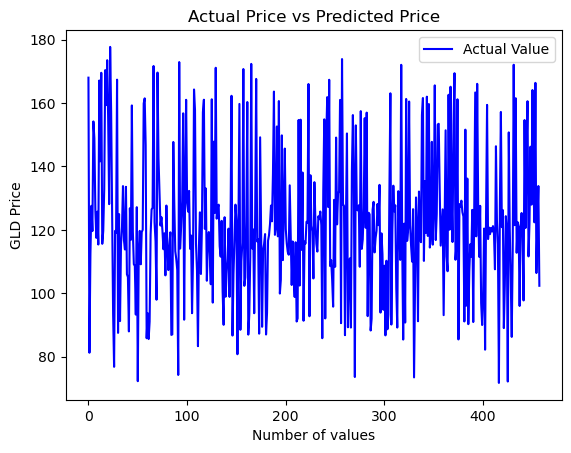

In [37]:
plt.plot(Y_test, color ='blue', label = 'Actual Value')
#plt.plot(test_data_prediction, color ='green', label='Prediction Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

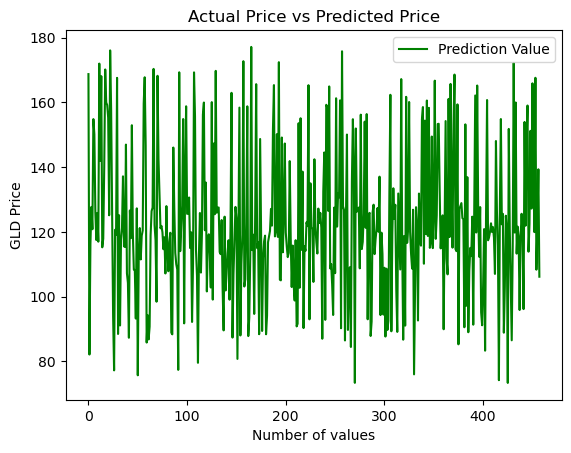

In [38]:
#plt.plot(Y_test, color ='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color ='green', label='Prediction Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

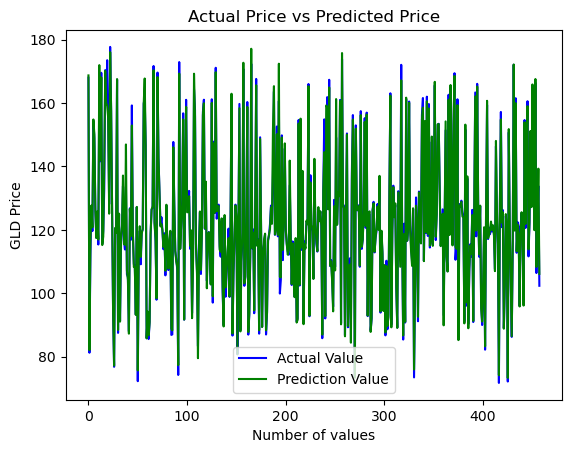

In [39]:
plt.plot(Y_test, color ='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color ='green', label='Prediction Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()